# OPTIMIZATION Algorithms and Applications- Rajesh Kumar Arora

## Chapter-3 Unconstrained Optimization

# Spring system

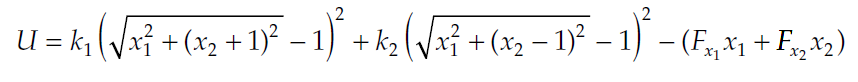

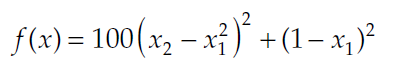

In [8]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numdifftools

## Spring System Function 

In [9]:
def f(x):
    k1, k2 = 100, 90
    F1, F2 = 20, 40
    U = k1*(np.sqrt(x[0]**2 + (x[1] + 1)**2) - 1)**2 + k2*(np.sqrt(x[0]**2 + (x[1] - 1)**2) - 1)**2 - (F1*x[0]+F2*x[1])
    return U

In [10]:
k1, k2 = 100, 90
F1, F2 = 20, 40
f = lambda x:k1*(np.sqrt(x[0]**2 + (x[1] + 1)**2) - 1)**2 + k2*(np.sqrt(x[0]**2 + (x[1] - 1)**2) - 1)**2 - (F1*x[0]+F2*x[1])

#### Central Difference Formula

In [11]:
def cdf_grad(x,f, del_x):
   # n = x.shape[1]
    n = len(x)
    grad = np.zeros(n)
    for i in range(n):
        y = x
        y[i] = x[i] + del_x
        grad[i] = f(y)
        y[i] = x[i] - del_x
        grad[i] = (grad[i] - f(y))/(2*del_x)
    return grad

### Minimum by Gradient descent

In [12]:
lr = 0.01
del_x = 0.001
x = np.array([1.,1])
eps = 0.000001

for it in range(100):
    f1 = f(x)
    grad = cdf_grad(x, f, del_x)
    x -=  lr*grad
    if abs(f(x) - f1) < eps:
        break
print(it)
print(x)   
f(x)

16
[0.50379534 0.12139234]


#### Hessian Matrix

In [13]:
def hessian(x0, func, epsilon=1.e-5):
  #  f1 = opt.approx_fprime(x0, func, epsilon=epsilon) 
    f1 = cdf_grad(x0, func, epsilon)
    # Allocate space for the hessian
    n = x0.shape[0]
    hessian = np.zeros((n,n))

    xx = x0
    for j in range(n):
        xx0 = xx[j] # Store old value
        xx[j] = xx0 + epsilon # Perturb with finite difference
        # Recalculate the partial derivatives for this new point
   #     f2 = scipy.optimize.approx_fprime(xx, func, epsilon=epsilon)
        f2 = cdf_grad(xx, func, epsilon)
        hessian[:, j] = (f2 - f1)/epsilon # scale...
        xx[j] = xx0 # Restore initial value of x0        
    return hessian

### Minimize by Newton's method

In [14]:
lr = 0.01
del_x = 0.001
x = np.array([1.,1])
eps = 0.000001

for it in range(10):
    f1 = f(x)
    grad = cdf_grad(x, f, del_x)
    hes = hessian(x, f, del_x)
    print(grad)
    x -=  np.dot(np.linalg.inv(hes),grad)
    if abs(f(x) - f1) < eps:
        break

print(x)   
f(x)

[45.35575548 90.60281056]
[ 25.22073095 -12.29505769]
[3.83882533 1.88665886]
[ 0.29971328 -0.06723575]
[0.00275305 0.00026127]
[4.1701238e-06 1.9642421e-07]
[0.50379508 0.12139422]


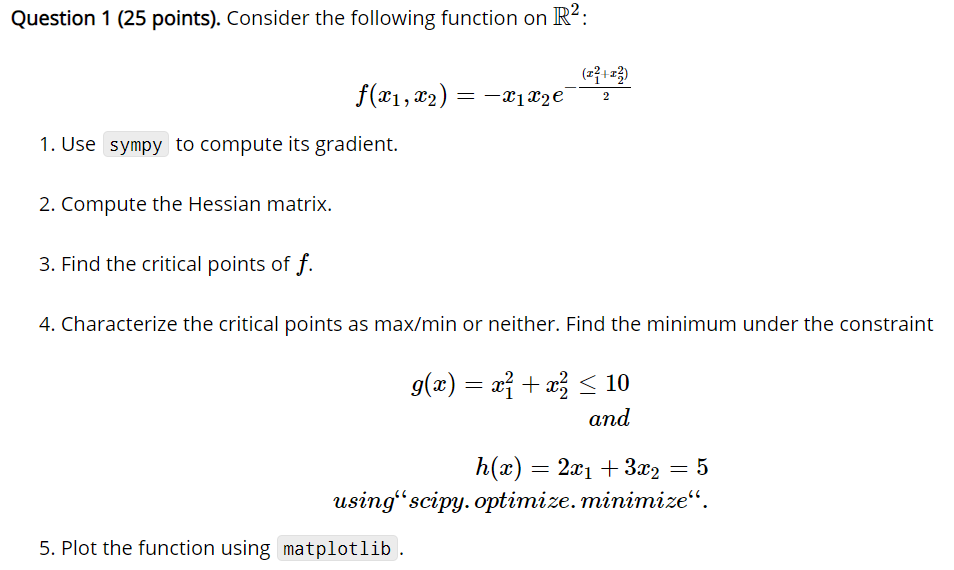

In [15]:
from sympy import symbols, Matrix, Function, simplify, exp, hessian, solve, init_printing
init_printing()

x1, x2 = symbols('x1 x2')
f, g, h = symbols('f g h', cls=Function)

X = Matrix([x1,x2])
f = Matrix([-x1*x2*exp(-(x1**2 + x2**2)/2)])
h = 2*x1 + 3*x2
g =  x1**2 + x2**2 - 10

In [16]:
gradf = simplify(f.jacobian(X))
gradf

⎡                  2     2                    2     2⎤
⎢                x₁    x₂                   x₁    x₂ ⎥
⎢              - ─── - ───                - ─── - ───⎥
⎢   ⎛  2    ⎞     2     2      ⎛  2    ⎞     2     2 ⎥
⎣x₂⋅⎝x₁  - 1⎠⋅ℯ             x₁⋅⎝x₂  - 1⎠⋅ℯ           ⎦

In [17]:
hessianf = simplify(hessian(f, X))
hessianf

⎡                           2     2                                         2 
⎢                         x₁    x₂                                        x₁  
⎢                       - ─── - ───                                     - ─── 
⎢            ⎛      2⎞     2     2         ⎛    2   2     2     2    ⎞     2  
⎢      x₁⋅x₂⋅⎝3 - x₁ ⎠⋅ℯ                   ⎝- x₁ ⋅x₂  + x₁  + x₂  - 1⎠⋅ℯ      
⎢                                                                             
⎢                                 2     2                             2     2 
⎢                               x₁    x₂                            x₁    x₂  
⎢                             - ─── - ───                         - ─── - ─── 
⎢⎛    2   2     2     2    ⎞     2     2               ⎛      2⎞     2     2  
⎣⎝- x₁ ⋅x₂  + x₁  + x₂  - 1⎠⋅ℯ                   x₁⋅x₂⋅⎝3 - x₂ ⎠⋅ℯ            

    2⎤
  x₂ ⎥
- ───⎥
   2 ⎥
     ⎥
     ⎥
     ⎥
     ⎥
     ⎥
     ⎥
     ⎦

In [18]:
import scipy.linalg as la

def characterize_cp(H):
    l,v = la.eig(H)
    if(np.all(np.greater(l,np.zeros(2)))):
       return("minimum")
    elif(np.all(np.less(l,np.zeros(2)))):
       return("maximum")
    else:
       return("saddle")

In [19]:
crit = solve(gradf, X)

In [20]:
for x in crit:
    H = np.array(hessianf.subs(dict(zip(X, x)))).astype('float')
    print(x, characterize_cp(H))

(-1, -1) minimum
(-1, 1) maximum
(0, 0) saddle
(1, -1) maximum
(1, 1) minimum


In [21]:
import scipy.optimize as opt

def f(x):
    return -x[0] * x[1] * np.exp(-(x[0]**2 + x[1]**2)/2)

cons = ({'type': 'eq',
         'fun' : lambda x: np.array([2.0*x[0] + 3.0*x[1] - 5.0]),
         'jac' : lambda x: np.array([2.0,3.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([-x[0]**2.0 - x[1]**2.0 + 10.0])})

x0 = [1.5,1.5]
cx = opt.minimize(f, x0, constraints=cons)
cx

     fun: -0.3678793283327613
     jac: array([-0.00033911,  0.00022599])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.9995392, 1.0003072])

D:\anaconda\envs\tf_2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\tf_2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
D:\anaconda\envs\tf_2\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


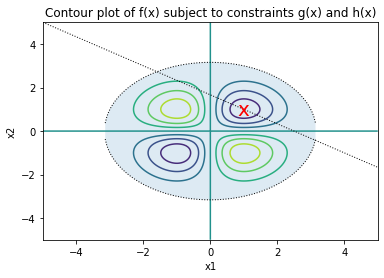

In [22]:
%matplotlib inline

x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((200,200))

plt.contour(X, Y, Z)

plt.plot(x, (5-2*x)/3, 'k:', linewidth=1)
plt.plot(x, (10.0-x**2)**0.5, 'k:', linewidth=1)
plt.plot(x, -(10.0-x**2)**0.5, 'k:', linewidth=1)
plt.fill_between(x,(10-x**2)**0.5,-(10-x**2)**0.5,alpha=0.15)
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.axis([-5,5,-5,5])
plt.title('Contour plot of f(x) subject to constraints g(x) and h(x)')
plt.xlabel('x1')
plt.ylabel('x2')
pass

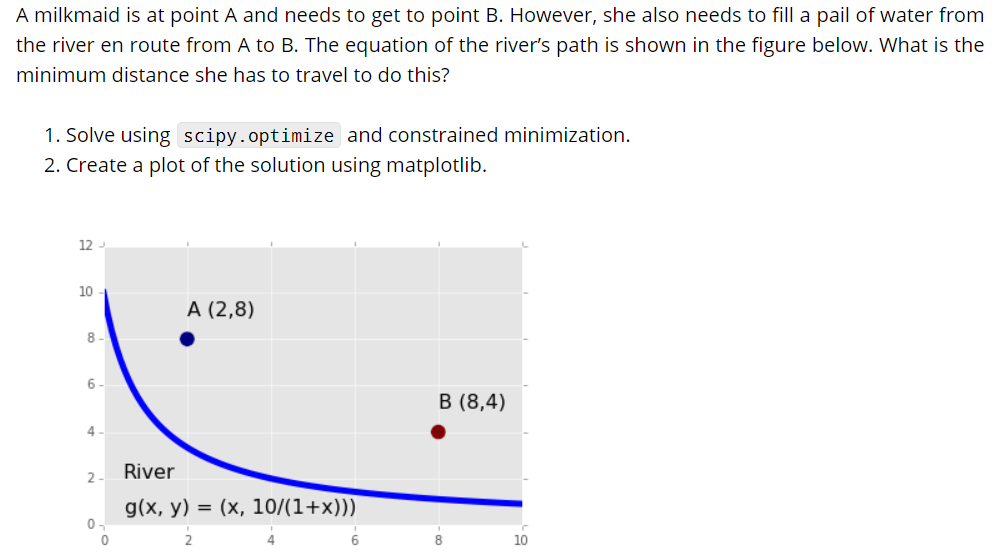

In [23]:
def f(x, A, B):
    return la.norm(x-A) + la.norm(x-B)

A = np.array([2,8])
B = np.array([8,4])
cons = {'type': 'eq', 'fun': lambda x: x[1] - 10.0/(1 + x[0])}

sols = []
for x0 in np.random.uniform(0, 10, (10, 2)):
    sols.append(opt.minimize(f, x0, args=(A, B), constraints=cons))
sol = sorted(sols, key=lambda x: x.fun)[0]
sol

     fun: 9.96339830035878
     jac: array([-1.65293837, -0.38808   ])
 message: 'Optimization terminated successfully.'
    nfev: 93
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([0.53225956, 6.5263094 ])

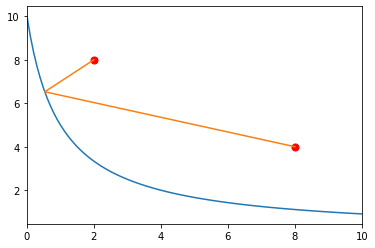

In [24]:
x = np.linspace(0, 10, 100)
plt.plot(x, 10/(1+x))
plt.scatter([2,8], [8,4], s=50, color='red')
plt.plot([2, sol.x[0], 8], [8, sol.x[1], 4])
plt.xlim([0, 10])
pass